# Predicting Iris

### Iris Dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.

In [1]:
# Importing the necessary libraries and dataset

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris

from sklearn import tree
from sklearn.metrics import accuracy_score as score

###  Goal

The goal is to predict the species of an Iris flower based on the length and width of its sepals and petals.

In [2]:
# Loading the iris dataset

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
features = iris[ "data" ]
species  = iris[ "target" ]
print("Features has a shape of" , features.shape ,".")

Features has a shape of (150, 4) .


In [5]:
species_names = iris[ "target_names" ]

for i, flower in enumerate(species_names):
    print( i , ". ", flower.capitalize())

0 .  Setosa
1 .  Versicolor
2 .  Virginica


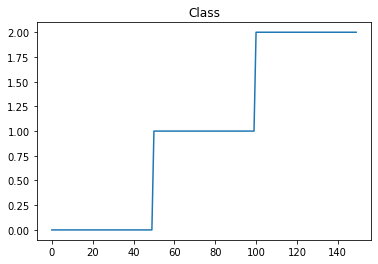

In [6]:
plt.plot(species)
plt.title("Class")
plt.show()

### Randomness

Randomness is used as a tool to help the learning algorithms be more robust and ultimately result in better predictions and more accurate models.

In [7]:
rand_indices = np.random.permutation(len( features ))

### Training and Validation sets

In [8]:
# Training data

features_tr = features[ rand_indices[: - 10 ]]
species_tr  = species[ rand_indices[: - 10 ]]

# Validation data

features_te = features[ rand_indices[ -10 : ]]
species_te  = species[ rand_indices[ -10 : ]]

### Decision tree Classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. 

They can perform both __classification__ and __regression__ tasks. 

They are very powerful algorithms, capable of fitting complex datasets.

In [9]:
classifier = tree.DecisionTreeClassifier()

# Fitting the classifier with the trainig data

classifier.fit( features_tr, species_tr )

preds= classifier.predict(features_te)

for pred in preds:
    print( pred ," : ", species_names[pred].capitalize())

1  :  Versicolor
2  :  Virginica
1  :  Versicolor
1  :  Versicolor
2  :  Virginica
0  :  Setosa
1  :  Versicolor
2  :  Virginica
1  :  Versicolor
1  :  Versicolor


### Prediction accuracy

In [10]:
accuracy = score( preds, species_te ) * 100

print("Accuracy of the model is ", accuracy ,"% .")

Accuracy of the model is  100.0 % .
